In [18]:
import numpy as np
import time
import math
from matplotlib import pyplot as plt
import pandas as pd

In [19]:
def selc_func(x):
    #return np.log(x + 1)
    return 1

def wy_tradegy(predmax, predmin, truemax, truemin, trueopen, trueover, setwater = 0.5):
    open_money = trueopen * (1 - setwater)
    ticket = setwater
    res = open_money
    mid = trueopen
    if truemin < mid:
        theory_ke = int((mid - predmin) / 0.01)
        real_ke = int((mid - truemin) / 0.01)
        ssum = 0.0
        for i in range(theory_ke):
            ssum += selc_func(i)
        
        for i in range(min(real_ke, theory_ke)):
            res -= ((mid - i * 0.01) * selc_func(i) / ssum) * setwater
            ticket += (selc_func(i) / ssum) * setwater


    if truemax > mid:
        theory_ke = int((predmax - mid) / 0.01)
        real_ke = int((truemax - mid) / 0.01)
        ssum = 0.0
        for i in range(theory_ke):
            ssum += selc_func(i)
        
        for i in range(min(real_ke, theory_ke)):
            res += ((mid + i * 0.01) * selc_func(i) / ssum) * setwater
            ticket -= (selc_func(i) / ssum) * setwater

    res += trueover*(ticket - setwater)
    ticket = setwater
    return res/trueover + setwater
 

In [20]:
data = pd.read_csv('../analysis/result1.csv')

In [21]:
open = list(data['open'])
open_truth = list(data['open_truth'])
close = list(data['close'])
close_truth = list(data['close_truth'])
high = list(data['high'])
high_truth = list(data['high_truth'])
low = list(data['low'])
low_truth = list(data['low_truth'])

open -0.06913876045422636 0.03605684712580427
close -0.03130932473085527 0.026948278384789588
high -0.028133936065601238 0.05010067320264783
low -0.03375369084170155 0.04621003815705705


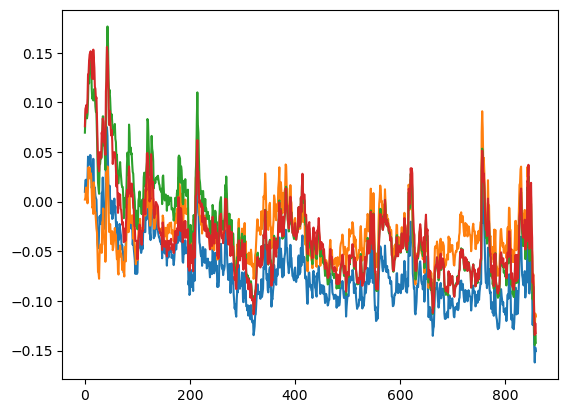

In [22]:
for i in ['open', 'close', 'high', 'low']:
    error = (data[i]-data[i+'_truth'])/data[i+'_truth']
    print(i, error.mean(), error.std())
    plt.plot(error)

In [32]:
rk = 1.0
#print(wy_tradegy(1, 0.8, 1, 0.4, 0.5, 0.5, 0.5))
for i in range(len(open)):
    amptl = wy_tradegy(high[i], low[i], high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
    #amptl = wy_tradegy(open_truth[i] + (high[i] - low[i]) / 2, open_truth[i] - (high[i] - low[i]) / 2, high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
    
    rk *=amptl

print(rk)

0.9945953747064542


In [33]:
def set(x):
    rk = 1.0
    #print(wy_tradegy(1, 0.8, 1, 0.4, 0.5, 0.5, 0.5))
    for i in range(len(open)):
        amptl = wy_tradegy(high[i], low[i], high_truth[i], low_truth[i], open_truth[i], close_truth[i], x)
        #amptl = wy_tradegy(open_truth[i] + (high[i] - low[i]) / 2, open_truth[i] - (high[i] - low[i]) / 2, high_truth[i], low_truth[i], open_truth[i], close_truth[i], 0.5)
        
        rk *=amptl

    return rk

In [38]:
plt.plot(range(0,100,5), [set(x/100) for x in range(0,100,5)])

TypeError: unsupported operand type(s) for /: 'range' and 'int'